<h1>Андреев - 413</h1>

<h1>Задание 2</h1>

In [ ]:
pip install scikit-fuzzy

<h1>Алгоритмы нечеткого вывода</h1>

In [ ]:
def Larsen(small_price, medium_price, many_price, small_buy, medium_buy, many_buy):
    a1 = min(small_price, medium_buy)
    a2 = min(medium_price, small_buy)
    a3 = min(many_price, many_buy)
    a4 = min(small_price, many_buy)
    a5 = min(medium_price, many_buy)
    a6 = min(many_price, small_buy)
    c1 = a1 * medium_quality['y']
    c2 = a2 * small_quality['y']
    c3 = a3 * many_quality['y']
    c4 = a4 * many_quality['y']
    c5 = a5 * many_quality['y']
    c6 = a6 * medium_quality['y']
    c = np.maximum(np.maximum(c1, c2, c3), np.maximum(c4, c5, c6))
    plt.plot(x, c)
    return fuzz.centroid(x, c)

In [ ]:
def Mamdani(small_price, medium_price, many_price, small_buy, medium_buy, many_buy):
    a1 = min(small_price, medium_buy)
    a2 = min(medium_price, small_buy)
    a3 = min(many_price, many_buy)
    a4 = min(small_price, many_buy)
    a5 = min(medium_price, many_buy)
    a6 = min(many_price, small_buy)
    c1 = np.minimum(a1, medium_quality['y'])
    c2 = np.minimum(a2, small_quality['y'])
    c3 = np.minimum(a3, many_quality['y'])
    c4 = np.minimum(a4, many_quality['y'])
    c5 = np.minimum(a5, many_quality['y'])
    c6 = np.minimum(a6, medium_quality['y'])
    c = np.maximum(np.maximum(c1, c2, c3), np.maximum(c4, c5, c6))
    plt.plot(x, c)
    return fuzz.centroid(x, c)

In [ ]:
def Sugeno(small_price, medium_price, many_price, small_buy, medium_buy, many_buy):
    a1 = min(small_price, medium_buy)
    a2 = min(medium_price, small_buy)
    a3 = min(many_price, many_buy)
    a4 = min(small_price, many_buy)
    a5 = min(medium_price, many_buy)
    a6 = min(many_price, small_buy)
    z1 = small_price * 9 + medium_buy * 7
    z2 = medium_price * 9 + small_buy * 7
    z3 = many_price * 9 + many_buy * 7
    z4 = small_price * 9 + many_buy * 7
    z5 = medium_price * 9 + many_buy * 7
    z6 = many_price * 9 + small_buy * 7
    return (a1 * z1 + a2 * z2 + a3 * z3 + a4 * z4 + a5 * z5 + a6 * z6) / (a1 + a2 + a3 + a4 + a5 + a6)

<h2>Пусть цена = 9, количество закупок = 7</h2>

Text(0.5, 1.0, 'Quality')

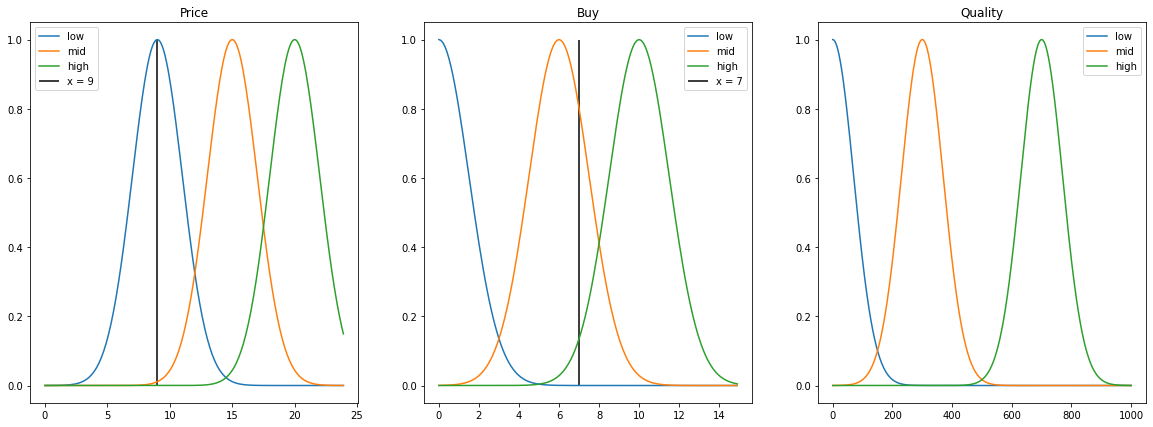

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from copy import copy
import skfuzzy as fuzz

sm_pr = {'mean': 9, 'width': 2, 'name': 'low', 'range': (0, 24)}
mid_pr = {'mean': 15, 'width': 2, 'name': 'mid', 'range': (0, 24)}
many_pr = {'mean': 20, 'width': 2, 'name': 'high', 'range': (0, 24)}

price = (sm_pr, mid_pr, many_pr)

sm_buy = {'mean': 0, 'width': 1.5, 'name': 'low', 'range': (0, 15)}
mid_buy = {'mean': 6, 'width': 1.5, 'name': 'mid', 'range': (0, 15)}
man_buy = {'mean': 10, 'width': 1.5, 'name': 'high', 'range': (0, 15)}

buy = (sm_buy, mid_buy, man_buy)

sm_quality = {'mean': 0, 'width': 70, 'name': 'low', 'range': (0, 1000)}
mid_quality = {'mean': 300, 'width': 70, 'name': 'mid', 'range': (0, 1000)}
man_quality = {'mean': 700, 'width': 70, 'name': 'high', 'range': (0, 1000)}

quality = (sm_quality, mid_quality, man_quality)

plt.figure(figsize=(20, 7))
gs = GridSpec(1, 3)
ax = (plt.subplot(gs[0, 0]), plt.subplot(gs[0, 1]), plt.subplot(gs[0, 2]))
ax[0].vlines(9, 0, 1, label='x = 9')
ax[1].vlines(7, 0, 1, label='x = 7')
for i, params in enumerate((price, buy, quality)):
    x = np.arange(params[0]['range'][0], params[0]['range'][1], 0.1)
    for param in params:
        y = norm.pdf(x, param['mean'], param['width'])
        y /= y.max()
        ax[i].plot(x, y, label=param['name'])
        param['x'] = x
        param['y'] = copy(y)
    ax[i].legend()

ax[0].set_title('Price')
ax[1].set_title('Buy')
ax[2].set_title('Quality')

<h2>Правила</h2>

1. Если цена - МАЛО и количество закупок - СРЕДНЕ, то качество - СРЕДНЕ.
2. Если цена - СРЕДНЕ и количество закупок - МАЛО, то качество - МАЛО.
3. Если цена - МНОГО и количество закупок - МНОГО, то качество - МНОГО.
4. Если цена - МАЛО и количество закупок - МНОГО, то качество - МНОГО .
5. Если цена - СРЕДНЕ и количество закупок - МНОГО, то качество - МНОГО.
6. Если цена - МНОГО и количество закупок - МАЛО, то качество - СРЕДНЕ.

<h2>Находим пересечения</h2>

In [ ]:
mask = np.isclose(sm_pr['x'], 9)
small_price = sm_pr['y'][mask][0]
medium_price = mid_pr['y'][mask][0]
many_price = many_pr['y'][mask][0]

mask = np.isclose(mid_buy['x'], 7)
small_buy = sm_buy['y'][mask][0]
medium_buy = mid_buy['y'][mask][0]
many_buy = man_buy['y'][mask][0]

<h2>Выведем правила</h2>

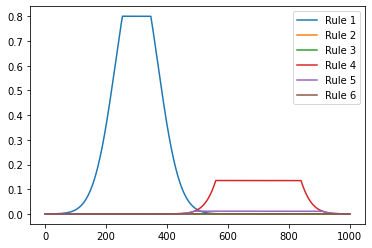

In [ ]:
x = np.arange(0, 1000, 0.1)
rule1 = min(small_price, medium_buy)
mask = mid_quality['y'] > rule1
y1 = mid_quality['y'].copy()
y1[mask] = rule1
plt.plot(x, y1, label='Rule 1')

rule2 = min(medium_price, small_buy)
mask = sm_quality['y'] > rule2
y2 = sm_quality['y'].copy()
y2[mask] = rule2
plt.plot(x, y2, label='Rule 2')

rule3 = min(many_price, many_buy)
mask = man_quality['y'] > rule3
y3 = man_quality['y'].copy()
y3[mask] = rule3
plt.plot(x, y3, label='Rule 3')

rule4 = min(small_price, many_buy)
mask = man_quality['y'] > rule4
y4 = man_quality['y'].copy()
y4[mask] = rule4
plt.plot(x, y4, label='Rule 4')

rule5 = min(medium_price, many_buy)
mask = man_quality['y'] > rule5
y5 = man_quality['y'].copy()
y5[mask] = rule5
plt.plot(x, y5, label='Rule 5')

rule6 = min(many_price, small_buy)
mask = mid_quality['y'] > rule6
y6 = mid_quality['y'].copy()
y6[mask] = rule6
plt.plot(x, y6, label='Rule 6')
plt.legend()

387.3059339377965


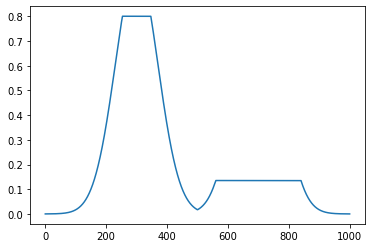

In [ ]:
sum = np.maximum(np.maximum(y1, y2, y3), np.maximum(y4, y5, y6))
plt.plot(x, sum)
print(fuzz.centroid(x, sum))

<h2>Результат работы алгоритма Ларсена</h2>

357.60123162909724


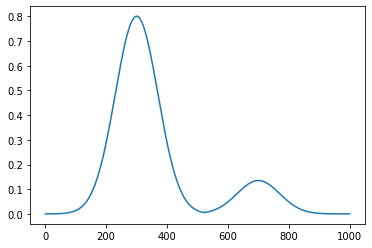

In [ ]:
res = Larsen(small_price, medium_price, many_price, small_buy, medium_buy, many_buy)
print(res)

<h2>Результат работы алгоритма Мамдани</h2>

387.3059339377965


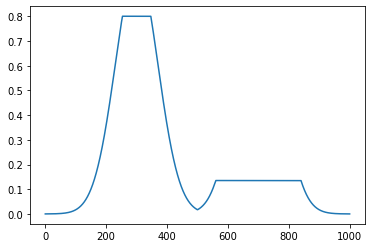

In [ ]:
res = Mamdani(small_price, medium_price, many_price, small_buy, medium_buy, many_buy)
print(res)

<h2>Результат работы алгоритма Сугено</h2>

In [ ]:
print(Sugeno(small_price, medium_price, many_price, small_buy, medium_buy, many_buy))

13.780353704900964
